# Imports

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import os
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import math

import matplotlib as mpl
import matplotlib.font_manager as fm
from matplotlib.lines import Line2D

mpl.rcParams["figure.dpi"] = 300
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams["font.family"] = "Times New Roman"

# Util Functions

In [2]:
def load_jsonl(path):
    with open(path, 'r') as f:
        data = [json.loads(line) for line in f]
    return data

# DM Math Ngram Frequency Histogram

1000
841


(array([32., 16., 13., 11., 10., 30., 36., 38., 40., 30., 24., 18., 21.,
        23., 25., 15., 25., 25., 20., 24., 16., 12., 19., 13., 10.,  7.,
        10.,  9., 10.,  4.,  9.,  3.,  4.,  7.,  5.,  9.,  7.,  1.,  9.,
         8.,  5., 10.,  7.,  4.,  6.,  6.,  4.,  1.,  5.,  6.,  5.,  4.,
         9.,  3.,  6.,  6.,  1.,  6.,  4.,  1.,  4.,  4.,  3.,  1.,  3.,
         5.,  4.,  1.,  5.,  2.,  2.,  2.,  1.,  1.,  0.,  2.,  4.,  2.,
         5.,  3.,  4.,  3.,  0.,  2.,  0.,  3.,  1.,  1.,  5.,  1.,  3.,
         2.,  3.,  1.,  2.,  4.,  0.,  0.,  2.,  3.]),
 array([  142.38199513,  1132.42969692,  2122.47739871,  3112.5251005 ,
         4102.57280228,  5092.62050407,  6082.66820586,  7072.71590765,
         8062.76360944,  9052.81131122, 10042.85901301, 11032.9067148 ,
        12022.95441659, 13013.00211838, 14003.04982016, 14993.09752195,
        15983.14522374, 16973.19292553, 17963.24062731, 18953.2883291 ,
        19943.33603089, 20933.38373268, 21923.43143447, 22913.47913625,
  

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

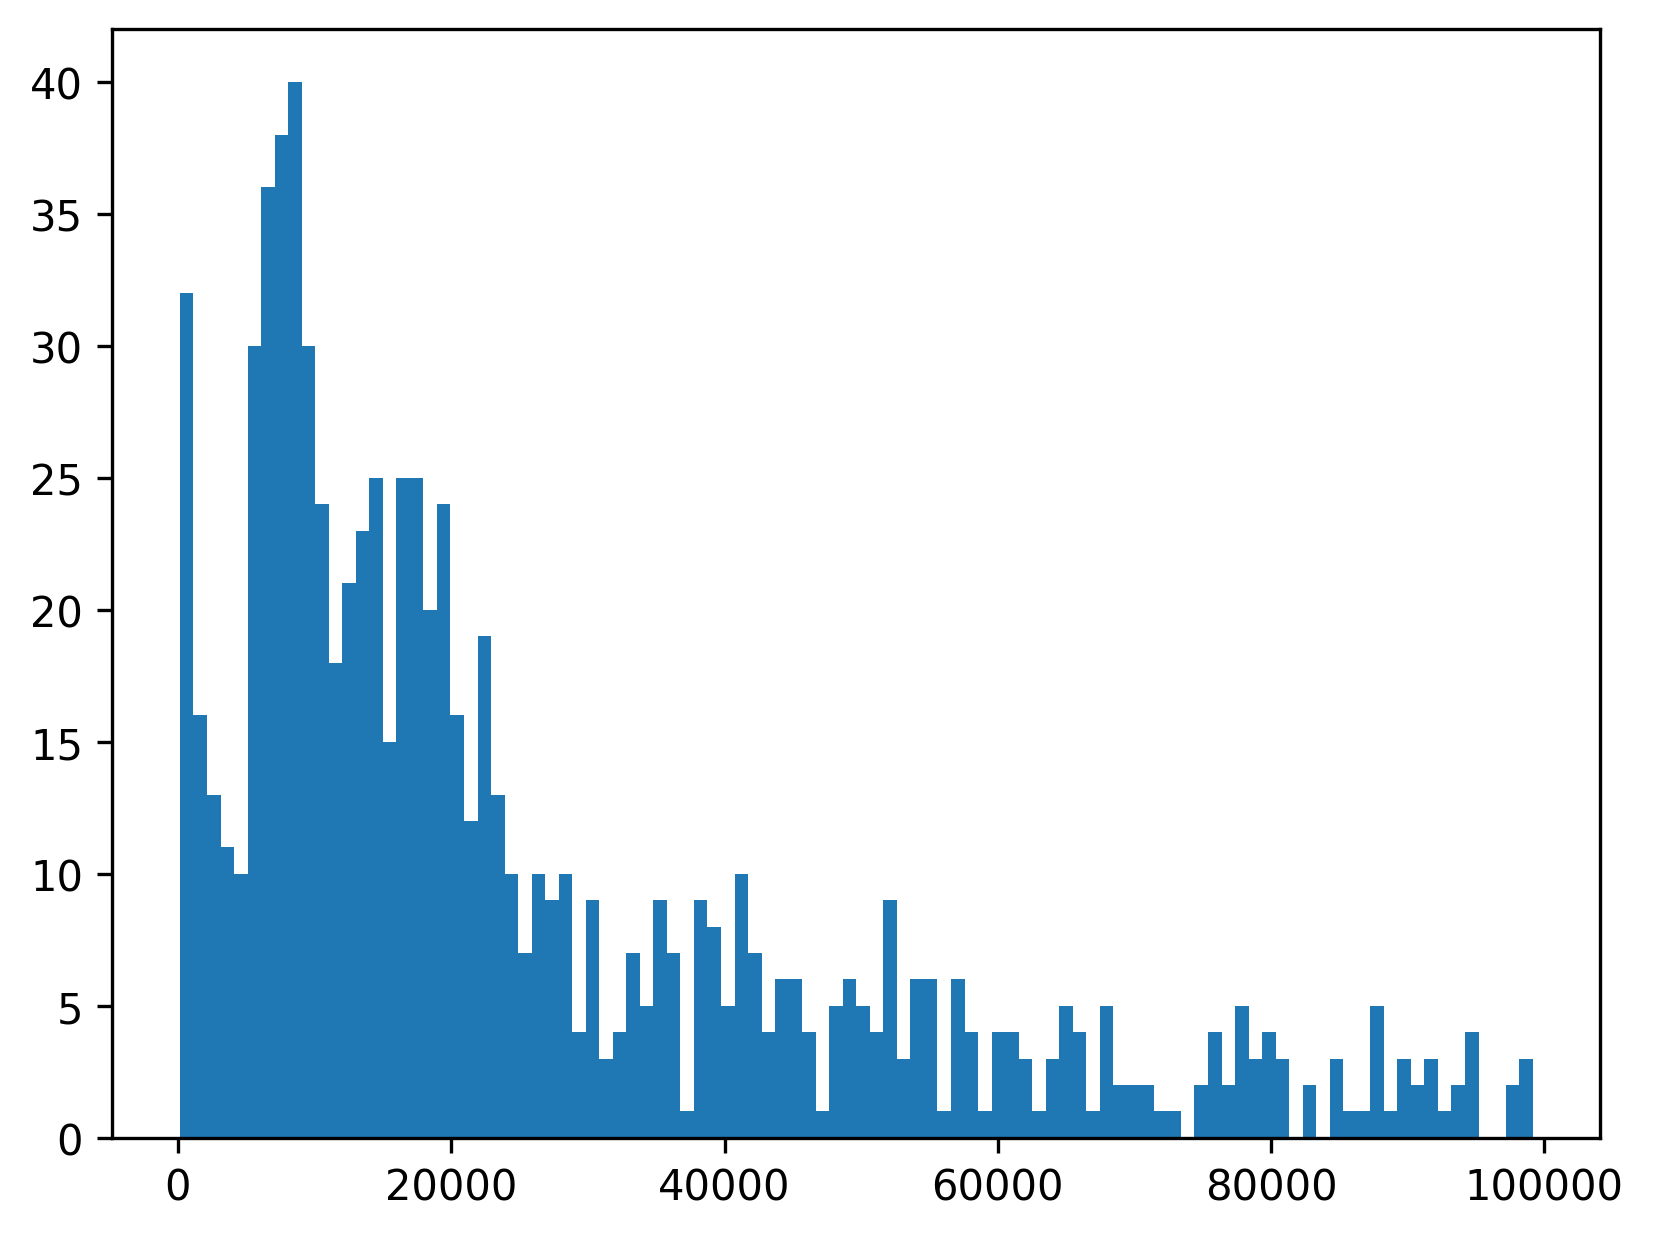

In [24]:
# Load DM Math n-gram frequency results
dm_math_path = "/mmfs1/gscratch/h2lab/micdun/mimir/analysis/dm_math_analysis/out/dm_mathematics-7-gram-freq.jsonl"
dm_math_freqs = load_jsonl(dm_math_path)
print(len(dm_math_freqs))

# fig, axs = plt.subplots(1, 2, tight_layout=True)

# # Check ngram overlap for sanity
# dm_math_ngram_overlap = [np.count_nonzero(sample["counts"]) / len(sample["counts"]) for sample in dm_math_freqs]
# axs[0].hist(dm_math_ngram_overlap, bins=100)

dm_math_freq_dist = [np.mean([freq for freq in sample["counts"] if freq > 0]) for sample in dm_math_freqs if np.mean([freq for freq in sample["counts"] if freq > 0]) < 100000]
print(len(dm_math_freq_dist))

plt.hist(dm_math_freq_dist, bins=100)

# HackerNews Ngram Frequency Histogram

1000
970


(array([376.,  93.,  52.,  48.,  44.,  38.,  34.,  28.,  23.,  11.,  24.,
         11.,  16.,   8.,  15.,  10.,   6.,   6.,   2.,   9.,   5.,   5.,
          1.,   3.,   4.,   5.,   5.,   2.,   2.,   2.,   4.,   1.,   6.,
          2.,   4.,   0.,   3.,   2.,   0.,   3.,   2.,   0.,   0.,   0.,
          2.,   2.,   0.,   2.,   1.,   0.,   1.,   3.,   0.,   1.,   2.,
          1.,   1.,   1.,   6.,   1.,   1.,   3.,   0.,   1.,   2.,   2.,
          0.,   2.,   0.,   0.,   1.,   2.,   0.,   0.,   0.,   1.,   0.,
          0.,   1.,   1.,   0.,   0.,   0.,   1.,   4.,   1.,   1.,   2.,
          0.,   1.,   1.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,
          1.]),
 array([4.75000000e+00, 9.76184939e+02, 1.94761988e+03, 2.91905482e+03,
        3.89048976e+03, 4.86192470e+03, 5.83335963e+03, 6.80479457e+03,
        7.77622951e+03, 8.74766445e+03, 9.71909939e+03, 1.06905343e+04,
        1.16619693e+04, 1.26334042e+04, 1.36048391e+04, 1.45762741e+04,
        1.55477090e+04, 1.6519

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

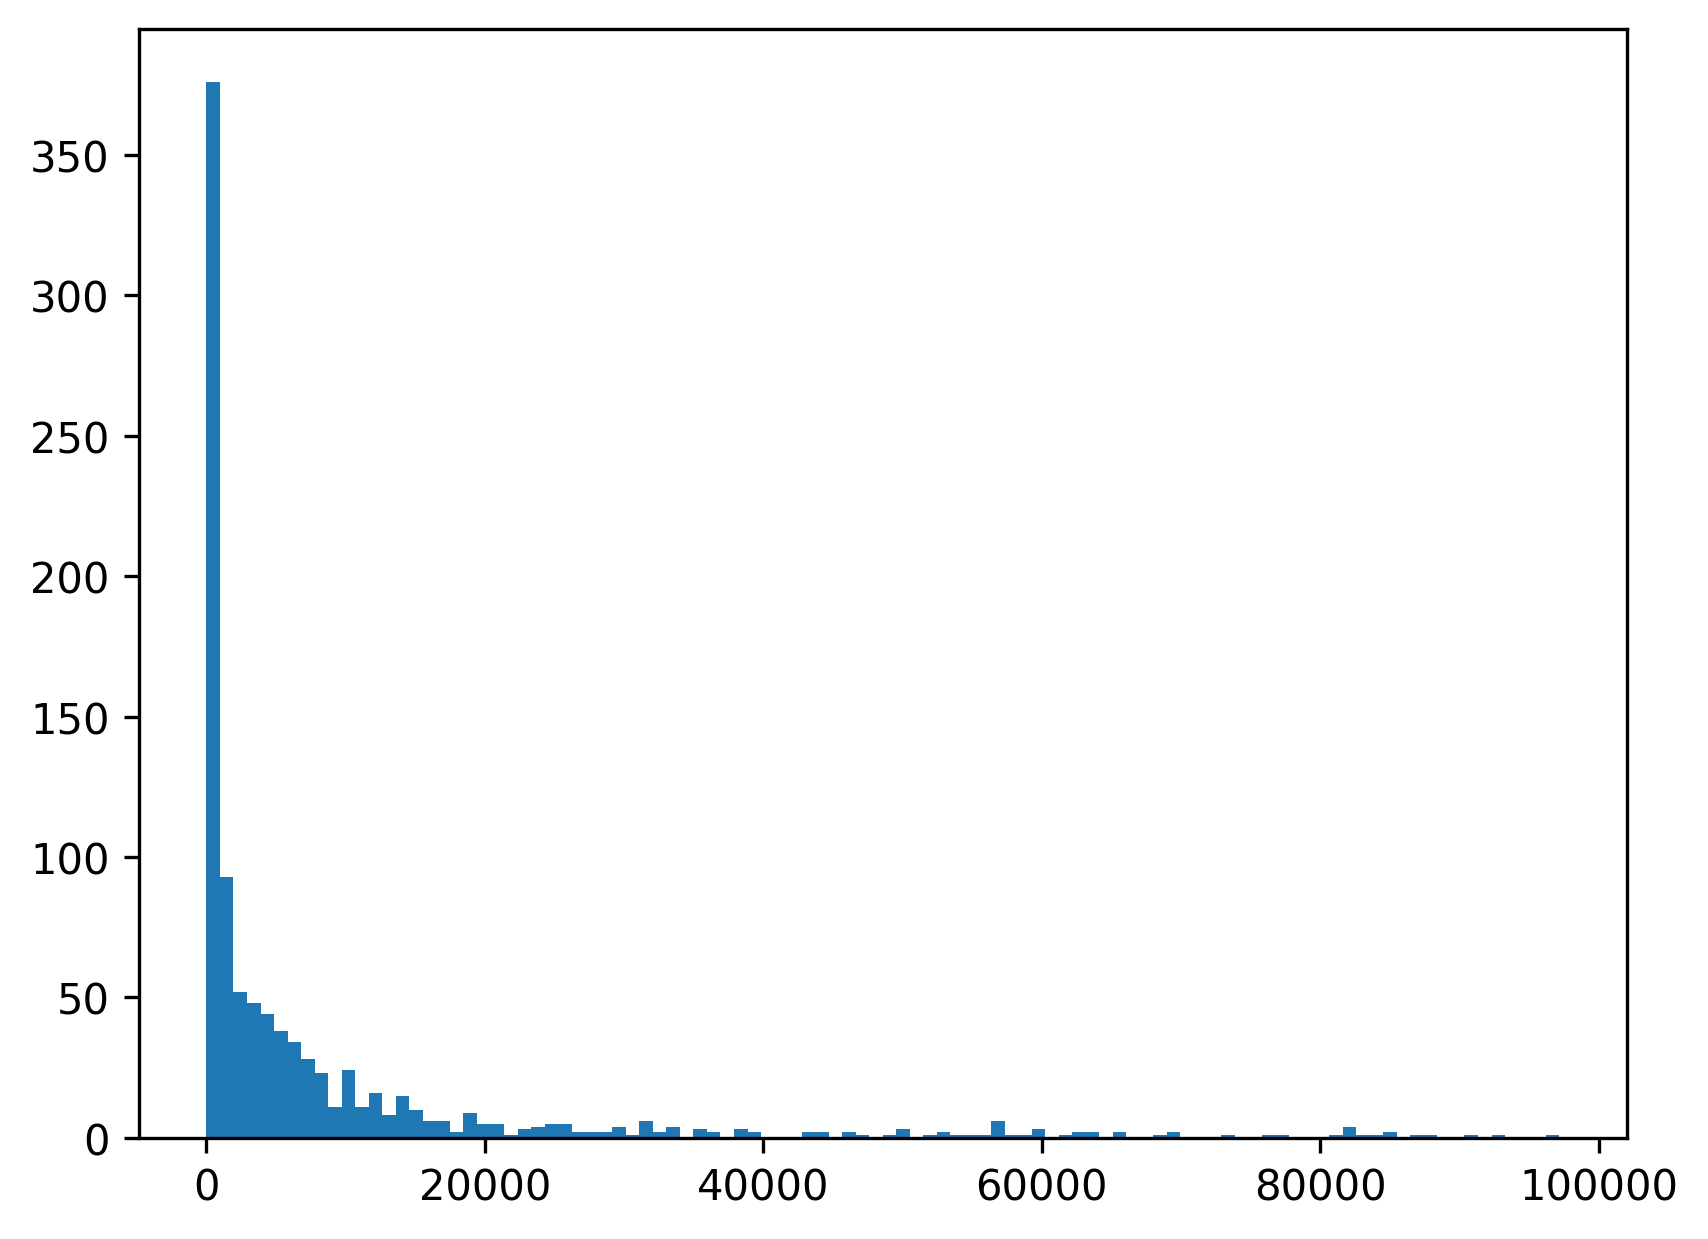

In [23]:
# Load DM Math n-gram frequency results
hn_path = "/mmfs1/gscratch/h2lab/micdun/mimir/analysis/dm_math_analysis/out/hackernews-7-gram-freq.jsonl"
hn_freqs = load_jsonl(hn_path)
print(len(hn_freqs))

# fig, axs = plt.subplots(1, 2, tight_layout=True)

# Check ngram overlap for sanity
# hn_ngram_overlap = [np.count_nonzero(sample["counts"]) / len(sample["counts"]) for sample in hn_freqs]
# axs[0].hist(hn_ngram_overlap, bins=100)

hn_freq_dist = [np.mean([freq for freq in sample["counts"] if freq > 0]) for sample in hn_freqs if np.mean([freq for freq in sample["counts"] if freq > 0]) < 100000]
print(len(hn_freq_dist))

plt.hist(hn_freq_dist, bins=100)

# Dolma s2ag Ngram Overlap

1000


(array([ 1.,  1.,  4.,  1.,  2.,  3.,  3.,  3.,  5.,  8., 10.,  6., 12.,
        11., 14., 11., 19., 15., 20., 11., 10., 17., 18., 15., 16., 18.,
        12., 19., 21., 16., 26., 25., 19., 17., 17., 17., 21., 13., 15.,
        13., 12., 13., 17., 15., 12., 10., 19., 11., 12.,  6., 10.,  6.,
        11., 11., 13.,  7., 10., 12.,  8.,  7.,  7.,  9.,  8.,  8.,  6.,
         5.,  7.,  5.,  4.,  4.,  7.,  6.,  4.,  3.,  3.,  3.,  0.,  3.,
         5.,  5.,  2., 10.,  5.,  7.,  5., 10.,  9., 10., 13.,  7.,  9.,
        11., 14., 15., 10.,  9., 11.,  5.,  5.,  4.]),
 array([0.08878505, 0.09758841, 0.10639177, 0.11519513, 0.12399849,
        0.13280185, 0.14160521, 0.15040857, 0.15921193, 0.1680153 ,
        0.17681866, 0.18562202, 0.19442538, 0.20322874, 0.2120321 ,
        0.22083546, 0.22963882, 0.23844218, 0.24724554, 0.2560489 ,
        0.26485227, 0.27365563, 0.28245899, 0.29126235, 0.30006571,
        0.30886907, 0.31767243, 0.32647579, 0.33527915, 0.34408251,
        0.35288587, 0.3616

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

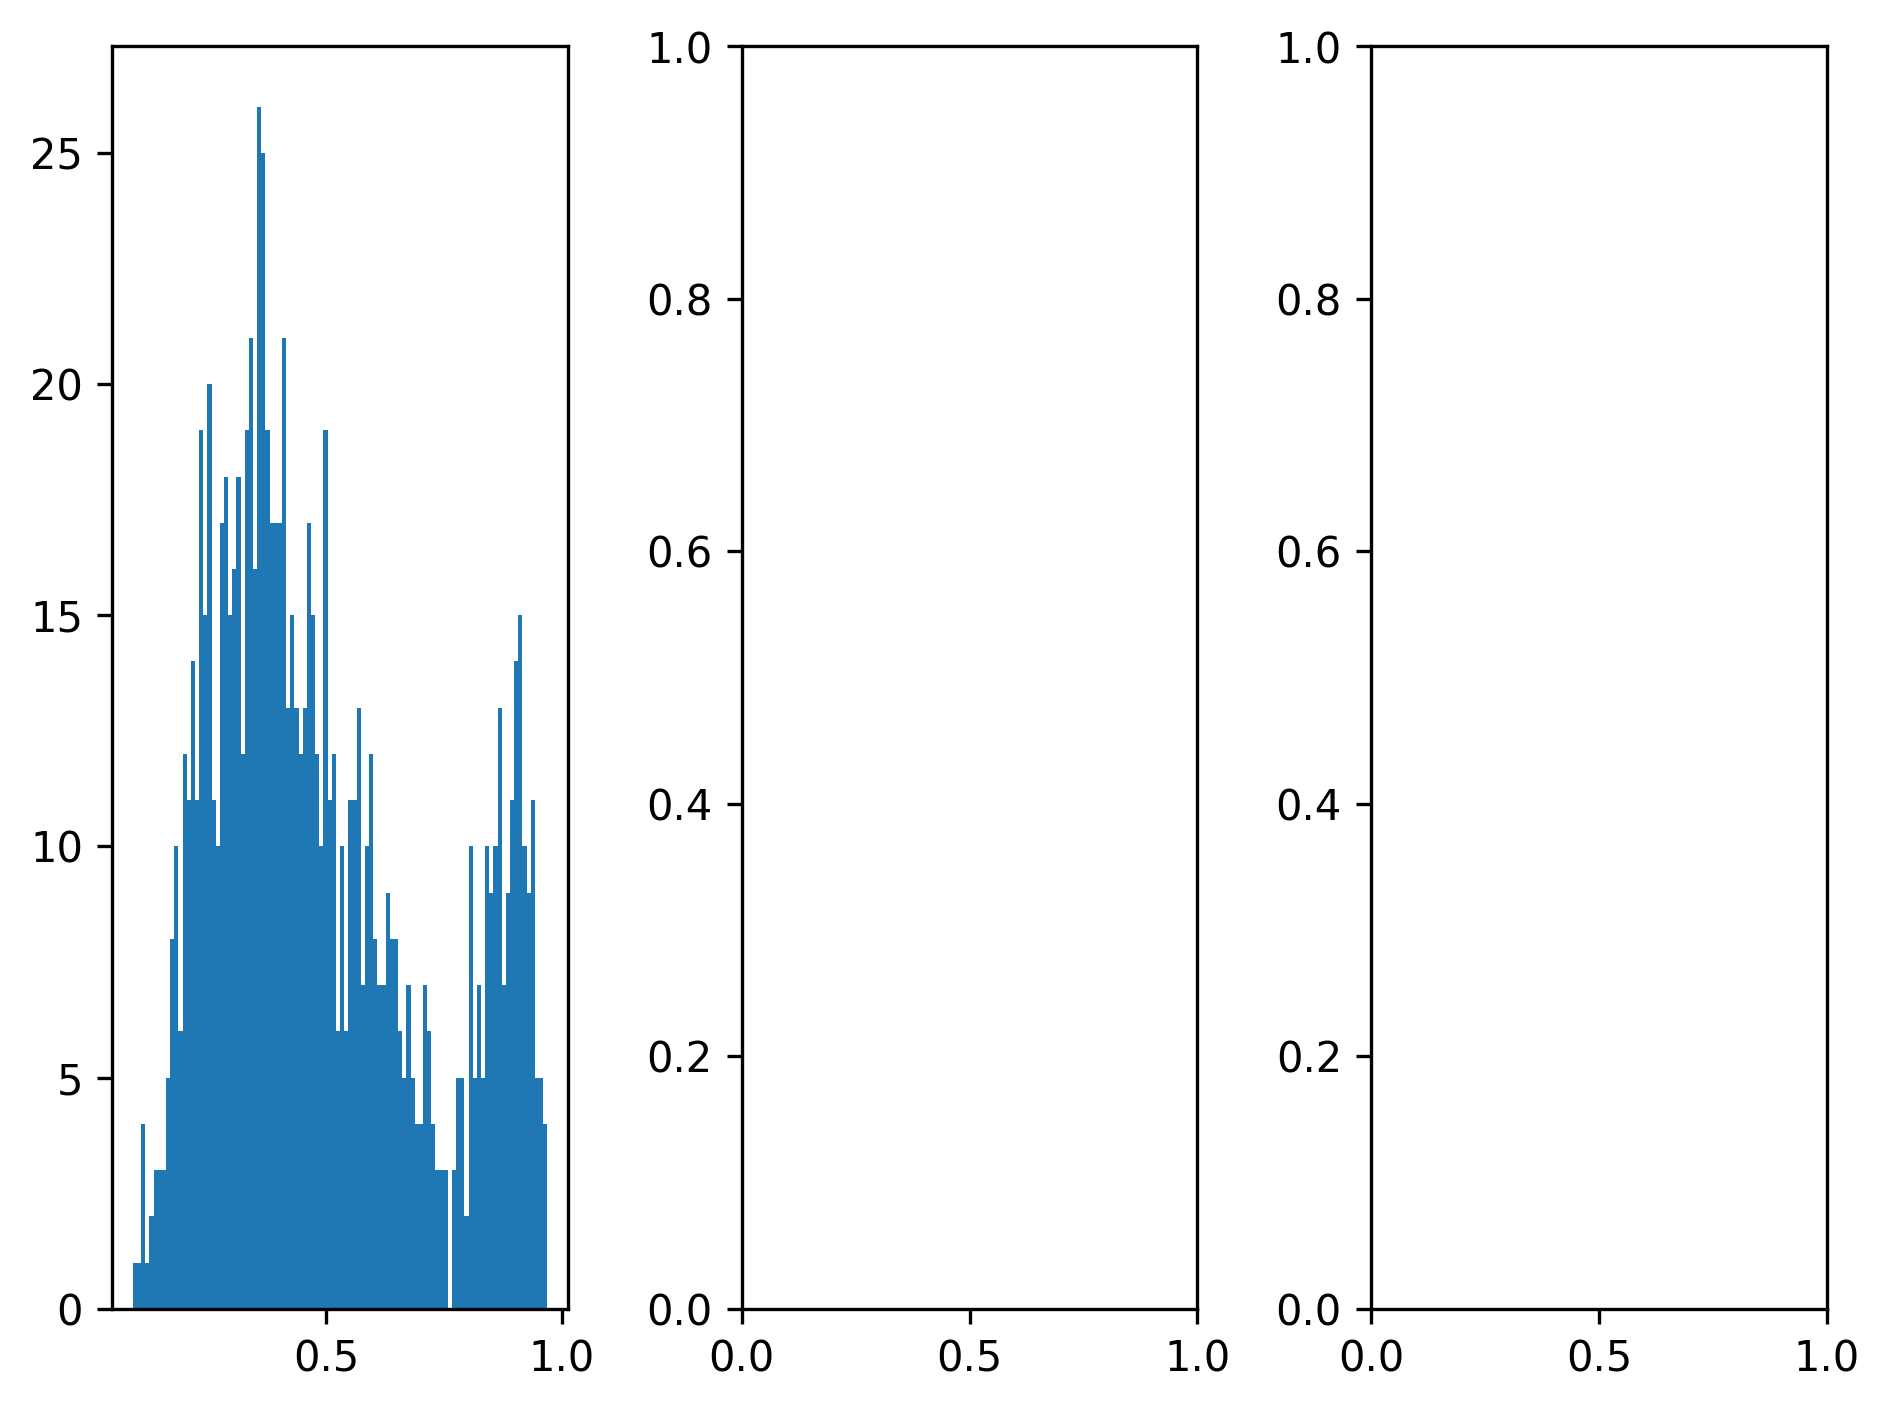

In [21]:
# Load Dolma S2AG n-gram frequency results
s2ag_path = "/mmfs1/gscratch/h2lab/micdun/mimir/analysis/dm_math_analysis/out/dolma_s2ag-7-gram-freq.jsonl"
s2ag_freqs = load_jsonl(s2ag_path)
print(len(s2ag_freqs))

fig, axs = plt.subplots(1, 3, tight_layout=True)

# Check ngram overlap for sanity
s2ag_ngram_overlap = [np.count_nonzero(sample["counts"]) / len(sample["counts"]) for sample in s2ag_freqs]
axs[0].hist(s2ag_ngram_overlap, bins=100)